## Task

Побудуйте класифікатор на основі дерева ухвалення рішень, використовуючи датасет ірісів Фішера - тренувальний набір ознак по трьох видах ірісів

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import graphviz

In [20]:
from sklearn import datasets
iris = datasets.load_iris()

In [21]:
X = iris.data[:, :]  
y = iris.target

In [22]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=50)
print(f"Кількість рядків в y_train по класам: {np.bincount(y_train)}")
print(f"Кількість рядків в y_test по класам: {np.bincount(y_test)}")

Кількість рядків в y_train по класам: [36 33 36]
Кількість рядків в y_test по класам: [14 17 14]


In [24]:
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=3, min_samples_leaf=5) 

In [25]:
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [26]:
y_predict = clf_model.predict(X_test)

In [27]:
metrics.accuracy_score(y_test,y_predict)

0.9555555555555556

[Text(0.375, 0.875, 'x[2] <= 2.6\ngini = 0.666\nsamples = 105\nvalue = [36, 33, 36]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.65\ngini = 0.499\nsamples = 69\nvalue = [0, 33, 36]'),
 Text(0.25, 0.375, 'x[2] <= 4.85\ngini = 0.157\nsamples = 35\nvalue = [0, 32, 3]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.375, 0.125, 'gini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.75, 0.375, 'x[0] <= 5.95\ngini = 0.057\nsamples = 34\nvalue = [0, 1, 33]'),
 Text(0.625, 0.125, 'gini = 0.245\nsamples = 7\nvalue = [0, 1, 6]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 27\nvalue = [0, 0, 27]')]

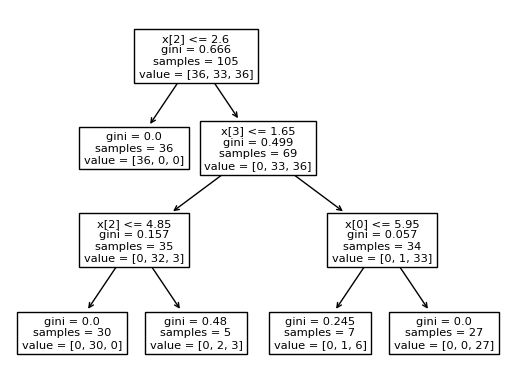

In [28]:
tree.plot_tree(clf_model) 

In [29]:
dot_data = tree.export_graphviz(clf_model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")

'iris.pdf'

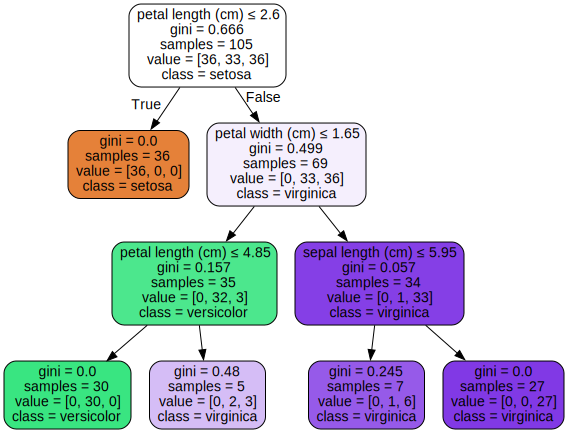

In [30]:
dot_data = tree.export_graphviz(clf_model, out_file=None, 
                     feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph